In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
# from ipywidgets import interactive
from matplotlib.widgets import Slider
sn.set_theme("notebook", "darkgrid")
%matplotlib widget
from sympy import solve, symbols, Eq, sqrt, I, init_printing, re, im
init_printing()

![](ex16.png)
![](ex16-2.png)
![](ex16-3.png)

## a)

$$\begin{align*}
    g(z - \varepsilon - \beta^2g) &= 1
    \\ \beta^2g^2 - g(z-\varepsilon) + 1 &= 0
    \\ g = \frac{z-\varepsilon \pm \sqrt{(z-\varepsilon)^2 - 4\beta^2}}{2\beta^2}
\end{align*}$$

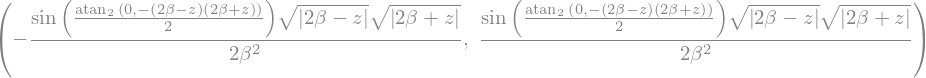

In [2]:
g, z, E, eta, eps, beta = symbols("g z E eta varepsilon beta", real=True)

eqn1 = 1/(z-eps-beta**2*g)

sol1, sol2 = solve(Eq(g, eqn1), g, )

(im(sol1.subs(z-eps, 
            z
            # E+ I*eta
            )), 
 im(sol2.subs(z-eps, 
            z
            # E + I*eta
            ))
 )

 Lets rewrite it a bit

$$\begin{align*}
    g &= \frac{z - \varepsilon \pm \sqrt{\left([z-\varepsilon] + \sqrt{4\beta^2}\right)\left([z-\varepsilon] - \sqrt{4\beta^2}\right)}}{2\beta^2}
    \\ &= \frac{z - \varepsilon \pm \sqrt{\left([z-\varepsilon] + 2|\beta|\right)\left([z-\varepsilon] - 2|\beta|\right)}}{2\beta^2}
    % \\ &= \frac{z - \varepsilon \pm \sqrt{-\left((z-\varepsilon) + 2|\beta|\right)\left((z-\varepsilon) - 2|\beta|\right)}}{2\beta^2}
\end{align*}$$

The physical (valid) solution is the one satisfying the condition that $g\to 0$ for $|z|\to \infty$.
<!-- first we consider the "$+$" solution. -->
$$
    g = \frac{z - \varepsilon \pm \sqrt{(z-\varepsilon)^2 + 4\beta^2}}{2\beta^2} \overset{|z|\gg 1}{=} \frac{z \pm \sqrt{z^2}}{2\beta^2} = \frac{z \pm |z| }{2\beta^2}
$$ 

which doesn't satisfy the condition for $g\to 0 $ for $z\to \infty$.

Next, we consider the "$+$" solution

$$
    g \overset{z \ll 0} = \frac{-|z| + |z|}{2\beta^2} \sim 0
    \\
    g \overset{z \gg 0} = \frac{+|z| + |z|}{2\beta^2}  \sim 2\frac{|z|}{2\beta^2}
$$
<!-- 
$$
    g \sim \frac{z + |z|}{2\beta^2}
    \\ \lim_{z\to \infty} g = \infty
    \\ \lim_{z\to -\infty} g = 0
$$

which does not satisfy the condition in the limit $z\to\infty$.

For the "$-$" solution:

$$
    g \sim \frac{z - |z|}{2\beta^2}
    \\ \lim_{z\to \infty} g = 
    \\ \lim_{z\to -\infty} g = 0
$$ -->

Now we consider the "$-$" solution
$$
    g \overset{z \ll 0}{=} \frac{-|z| - |z|}{2\beta^2} = \frac{-2|z|}{2\beta^2}
    \\
    g \overset{z \gg 0}{=} \frac{|z| - |z|}{2\beta^2} = 0
$$

And using the hint, we choose the solution to be a piecewise

$$
    g = \begin{cases}
        \frac{E -\varepsilon + i\eta + \sqrt{\Big(E -\varepsilon + 2|\beta| + i\eta \Big)\Big(E - \varepsilon - 2|\beta| + i\eta \Big)}}{2\beta^2} & E - \varepsilon > -2|\beta|  \\
        \frac{E -\varepsilon + i\eta - \sqrt{\Big(E -\varepsilon + 2|\beta| + i\eta \Big)\Big(E - \varepsilon - 2|\beta| + i\eta \Big)}}{2\beta^2} & E - \varepsilon > -2|\beta| 
    \end{cases}
$$

valid_rows.shape = (0,)
valid_cols.shape = (0,)


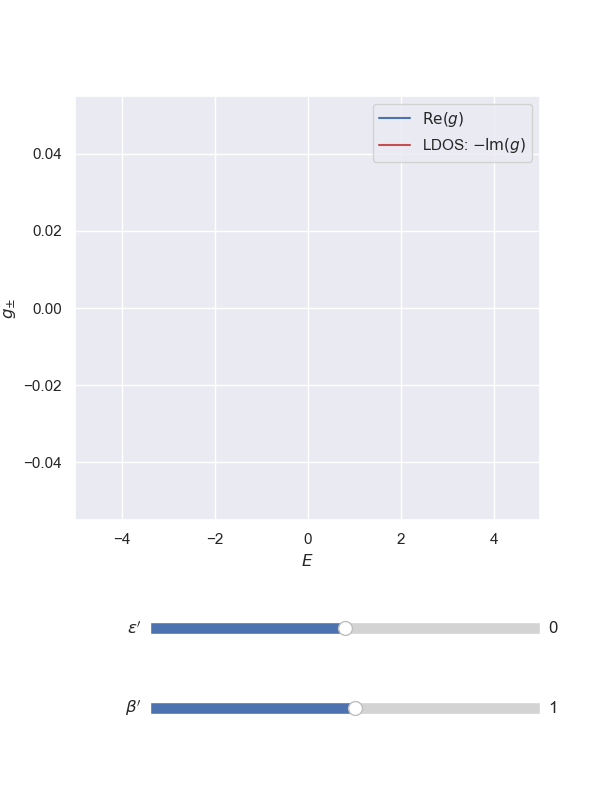

valid_rows.shape = (0,)
valid_cols.shape = (0,)
valid_rows.shape = (0,)
valid_cols.shape = (0,)
valid_rows.shape = (0,)
valid_cols.shape = (0,)
valid_rows.shape = (0,)
valid_cols.shape = (0,)
valid_rows.shape = (0,)
valid_cols.shape = (0,)
valid_rows.shape = (0,)
valid_cols.shape = (0,)


In [4]:
def g_T1(E, **kwargs):
    eta = kwargs.get("eta", 1e-2)
    beta = kwargs.get("beta", 1)
    eps = kwargs.get("eps", 0)
    # print(f"g_T1 called! {eps =}")
    return (E - eps + 1.j*eta)/(2*beta**2)

def g_T2(E, **kwargs):
    eta = kwargs.get("eta", 1e-2)
    beta = kwargs.get("beta", 1)
    eps = kwargs.get("eps", 0)
    # print(f"g_T2 called! {eps =}")
    z = E + 1.j*eta
    # T2 = np.sqrt( -(z - eps + 2*np.abs(beta))*(z - eps - 2*np.abs(beta))
    #         ) / (2*beta)
    
    return np.sqrt( (z - eps)**2 + 4*beta**2)/(2*beta**2)
    # return T2

def g_pm(E, **kwargs):
    # eps = kwargs.get("eps", 0)
    # eta = kwargs.get("eta", 1e-2)
    # beta = kwargs.get("beta", 1)
    
    T1 = g_T1(E, **kwargs)
    T2 = g_T2(E, **kwargs)
    arr = T1 + np.array([T2, -T2])
    return arr

def correct_sol(E, **params):
    
    # Es = params.get("Es", None)
    Y_values = g_pm(E, **params)
    Y_imag = Y_values.imag
    Y_real = Y_values.real
    valid_rows, valid_cols = np.argwhere(np.imag(Y_values) < 0).T
    print(f"{valid_rows.shape = }")
    print(f"{valid_cols.shape = }")
    
    # print(f"correct_sol called! {Y_real[valid_indicis].shape = }")
    # print(f"{valid_indicis.shape = }")
    return E[valid_cols], Y_values[valid_rows, valid_cols]
    
    
    

def plot_g(E, **kwargs):
    
    eta = kwargs.get("eta", 1e-2)
    beta = kwargs.get("beta", 1)
    eps = kwargs.get("eps", 0)
    
    fig, ax = plt.subplots(figsize=kwargs.get("figsize",(6,8)))
    plt.subplots_adjust(bottom=0.35)  # Adjust space for the sliders
    
    ax_slider_beta = plt.axes([0.25, 0.1, 0.65, 0.03]) # left, bottom, width, height   
    slider_beta = Slider(ax_slider_beta, label=r"$\beta '$", 
                         valmin=kwargs.get("betamin", -2), 
                         valmax=kwargs.get("betamax", 2), 
                         valinit=beta, 
                         valstep=kwargs.get("betastep", 0.1))
    
    ax_slider_eps = plt.axes([0.25, 0.2, 0.65, 0.03]) # left, bottom, width, height   
    slider_eps = Slider(ax_slider_eps, 
                        label=r"$\varepsilon '$", 
                        valmin=kwargs.get("epsmin", -2), 
                        valmax=kwargs.get("epsmax", 2), 
                        valinit=eps, 
                        valstep=kwargs.get("epsstep", 0.1))
    
    Es, gs = correct_sol(E, beta=beta, eps=eps, eta=eta)
    re_label = r"$\mathrm{Re}(g)$"
    ldos_label = r"LDOS: $-\mathrm{Im}(g)$"
    
    ax.plot(Es, gs.real, label=re_label, color="b")
    ax.plot(Es, -1 * gs.imag, label=ldos_label, color="r")

    ax.legend()

    ax.set(ylabel=r"$g_{\pm}$", 
        xlabel=r"$E$",
        xlim=(-5,5), 
        ylim=kwargs.get("ylim", (None, None))
        )
    
    def update(val):
        ax.clear()
        beta_prime = slider_beta.val
        eps_prime = slider_eps.val
        Es, gs =  correct_sol(E, beta=beta_prime, eps=eps_prime)
        ax.plot(Es, gs.real, label=re_label, color="b")
        ax.plot(Es, -1 * gs.imag, label=ldos_label, color="r")
        
        ax.set(ylabel=r"$g_{\pm}$", 
            xlabel=r"$E$",
            xlim=kwargs.get("xlim", (-5,5)), 
            ylim=kwargs.get("ylim", (None, None))
        )
        ax.legend()
        fig.canvas.draw_idle() # Redraw the plot
        
    slider_eps.on_changed(update)
    slider_beta.on_changed(update)
    
    # return fig, ax


Es = np.linspace(-5, 5, num=101)

plot_g(Es, betamin=-20, betamax=20, betastep=1)
plt.show()

<!-- ## b) -->